In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
resume_data = pd.read_csv('Dataset/Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,tanna sujatha objective seeking challenging ro...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,address manyata tech park nagavara bangalore l...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...


In [3]:
#label encoding
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,tanna sujatha objective seeking challenging ro...,1
1,PeopleSoft,classification internal classification interna...,1
2,PeopleSoft,anubhav kumar singh core competencies scriptin...,1
3,PeopleSoft,address manyata tech park nagavara bangalore l...,1
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,1
...,...,...,...
65,SDE Resume,srinivas koushik kondubhatla email srinivas ko...,3
66,SDE Resume,ripul agrawal software developer personal deta...,3
67,SDE Resume,sandeep reddy somu ssomu asu edu linkedin com ...,3
68,SDE Resume,aditya maskar last updated october lighttoinfi...,3


In [4]:
resume_data.isnull().sum()

Category          0
Resume_Details    1
LebelEncoding     0
dtype: int64

In [5]:
X = resume_data['Resume_Details'].values.astype('U')
y = resume_data['Category'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 45, test_size = 0.30,stratify = y)
X_train.shape, X_test.shape

((49,), (21,))

In [7]:
#vectorization
tfidf_vector = TfidfVectorizer(sublinear_tf = True,stop_words = 'english')

In [8]:
X_train = tfidf_vector.fit_transform(X_train)
X_test = tfidf_vector.transform(X_test)

In [9]:
X_train.shape, X_test.shape

((49, 3789), (21, 3789))

In [10]:
print(y_train),print(y_test)

['SDE Resume' 'PeopleSoft' 'SDE Resume' 'DS' 'PeopleSoft' 'SDE Resume'
 'DS' 'DS' 'React JS Developer' 'SDE Resume' 'DS' 'React JS Developer'
 'PeopleSoft' 'SDE Resume' 'SDE Resume' 'React JS Developer' 'DS' 'DS'
 'React JS Developer' 'React JS Developer' 'DS' 'DS' 'SDE Resume' 'DS'
 'SDE Resume' 'DS' 'SDE Resume' 'DS' 'React JS Developer' 'SDE Resume'
 'React JS Developer' 'SDE Resume' 'React JS Developer'
 'React JS Developer' 'DS' 'PeopleSoft' 'React JS Developer' 'PeopleSoft'
 'DS' 'React JS Developer' 'PeopleSoft' 'DS' 'DS' 'React JS Developer'
 'PeopleSoft' 'DS' 'React JS Developer' 'React JS Developer' 'SDE Resume']
['DS' 'SDE Resume' 'DS' 'SDE Resume' 'DS' 'PeopleSoft' 'DS'
 'React JS Developer' 'DS' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'SDE Resume' 'SDE Resume' 'React JS Developer' 'DS'
 'SDE Resume' 'DS' 'React JS Developer' 'PeopleSoft' 'React JS Developer']


(None, None)

In [11]:
#knn classifier
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(X_test, y_test)))
print('Classification report for classifier %s:\n%s\n' % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred, average = 'macro'), 2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'), 2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'), 2)
accuracy_knn = round(accuracy_score(y_test,y_pred), 2)

Accuracy of training set : 0.86
Accuracy of  test set    : 0.86
Classification report for classifier KNeighborsClassifier(n_neighbors=12):
                    precision    recall  f1-score   support

                DS       0.88      1.00      0.93         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.75      1.00      0.86         6
        SDE Resume       1.00      0.40      0.57         5

          accuracy                           0.86        21
         macro avg       0.91      0.85      0.84        21
      weighted avg       0.89      0.86      0.83        21




In [12]:
#decision tree
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.81
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

                DS       0.75      0.86      0.80         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.80      0.67      0.73         6
        SDE Resume       0.80      0.80      0.80         5

          accuracy                           0.81        21
         macro avg       0.84      0.83      0.83        21
      weighted avg       0.81      0.81      0.81        21




In [13]:
#random forest classfier
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.86
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

                DS       0.86      0.86      0.86         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.75      1.00      0.86         6
        SDE Resume       1.00      0.60      0.75         5

          accuracy                           0.86        21
         macro avg       0.90      0.86      0.87        21
      weighted avg       0.88      0.86      0.85        21




In [14]:
#svm classifier
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.76
Classification report for classifier SVC():
                    precision    recall  f1-score   support

                DS       0.58      1.00      0.74         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       1.00      1.00      1.00         6
        SDE Resume       0.00      0.00      0.00         5

          accuracy                           0.76        21
         macro avg       0.65      0.75      0.68        21
      weighted avg       0.62      0.76      0.67        21




In [15]:
#logistic regression
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_pred = model_lgr.predict(X_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.86
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

                DS       0.78      1.00      0.88         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.86      1.00      0.92         6
        SDE Resume       1.00      0.40      0.57         5

          accuracy                           0.86        21
         macro avg       0.91      0.85      0.84        21
      weighted avg       0.89      0.86      0.83        21




In [16]:
#bagging classifier
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(X_train, y_train)
y_pred = model_bagg.predict(X_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.88
Accuracy of  test set    : 0.90
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

                DS       0.88      1.00      0.93         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.86      1.00      0.92         6
        SDE Resume       1.00      0.60      0.75         5

          accuracy                           0.90        21
         macro avg       0.93      0.90      0.90        21
      weighted avg       0.92      0.90      0.90        21




In [17]:
#ada boost classifier
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(X_train, y_train)
y_pred = model_Adaboost.predict(X_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

                DS       0.88      1.00      0.93         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.83      0.83      0.83         6
        SDE Resume       1.00      0.80      0.89         5

          accuracy                           0.90        21
         macro avg       0.93      0.91      0.91        21
      weighted avg       0.91      0.90      0.90        21




In [18]:
#gradient boosting classifier
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(X_train, y_train)
y_pred = model_GradientBoost.predict(X_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.81
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

                DS       0.88      1.00      0.93         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       1.00      0.33      0.50         6
        SDE Resume       0.62      1.00      0.77         5

          accuracy                           0.81        21
         macro avg       0.88      0.83      0.80        21
      weighted avg       0.87      0.81      0.78        21




In [19]:
#naive baynes classifier
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.86
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

                DS       0.86      0.86      0.86         7
        PeopleSoft       1.00      1.00      1.00         3
React JS Developer       0.75      1.00      0.86         6
        SDE Resume       1.00      0.60      0.75         5

          accuracy                           0.86        21
         macro avg       0.90      0.86      0.87        21
      weighted avg       0.88      0.86      0.85        21




In [20]:
#CNN classifier
# from keras.models import Sequential,Model
# from tensorflow.keras.utils import plot_model
# from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding 
# from keras.layers import Dense, Embedding, GRU, LSTM, Dropout, Bidirectional
# from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D

In [21]:
# model = Sequential()
# model.add(Embedding(input_dim = 232337, output_dim=100, input_length=X_train.shape[1]))
# model.add(Conv1D(128, 3, activation='relu'))
# model.add(MaxPool1D(3))
# model.add(Dropout(0.2))
# model.add(Conv1D(128, 3, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(25, activation='softmax'))

# model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [22]:
# history = model.fit(X_train, y_train, batch_size = 64, epochs = 150, validation_data = (X_test, y_test), verbose = 1)

In [23]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)
# plt.plot(epochs, acc, 'bo', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

In [24]:
#model evaluation
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(X_train, y_train),model_DT.score(X_train, y_train),model_RF.score(X_train, y_train),model_svm.score(X_train, y_train),model_lgr.score(X_train, y_train),
                                 model_bagg.score(X_train, y_train),model_Adaboost.score(X_train, y_train),model_GradientBoost.score(X_train, y_train), model_NB.score(X_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.857143,0.860000,0.91,0.85,0.84
1,DecisionTree Classifier,1.000000,0.810000,0.84,0.83,0.83
2,RandomForest Classifier,1.000000,0.860000,0.90,0.86,0.87
3,SVM Classifier,1.000000,0.760000,0.65,0.75,0.68
4,Logistic Regression,1.000000,0.860000,0.91,0.85,0.84
5,Bagging Classifier,0.877551,0.900000,0.93,0.90,0.90
6,AdaBoost Classifier,1.000000,0.900000,0.93,0.91,0.91
7,Gradient Boosting Classifier,1.000000,0.809524,0.88,0.83,0.80
8,Naive Bayes Classifier,1.000000,0.860000,0.90,0.86,0.87


In [25]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(X_train, y_train)*100,model_DT.score(X_train, y_train)*100,
                  model_RF.score(X_train, y_train)*100,model_svm.score(X_train, y_train)*100,
                  model_lgr.score(X_train, y_train)*100,model_bagg.score(X_train, y_train)*100,
                  model_Adaboost.score(X_train, y_train)*100,model_GradientBoost.score(X_train, y_train)*100,
                  model_NB.score(X_train, y_train)*100]

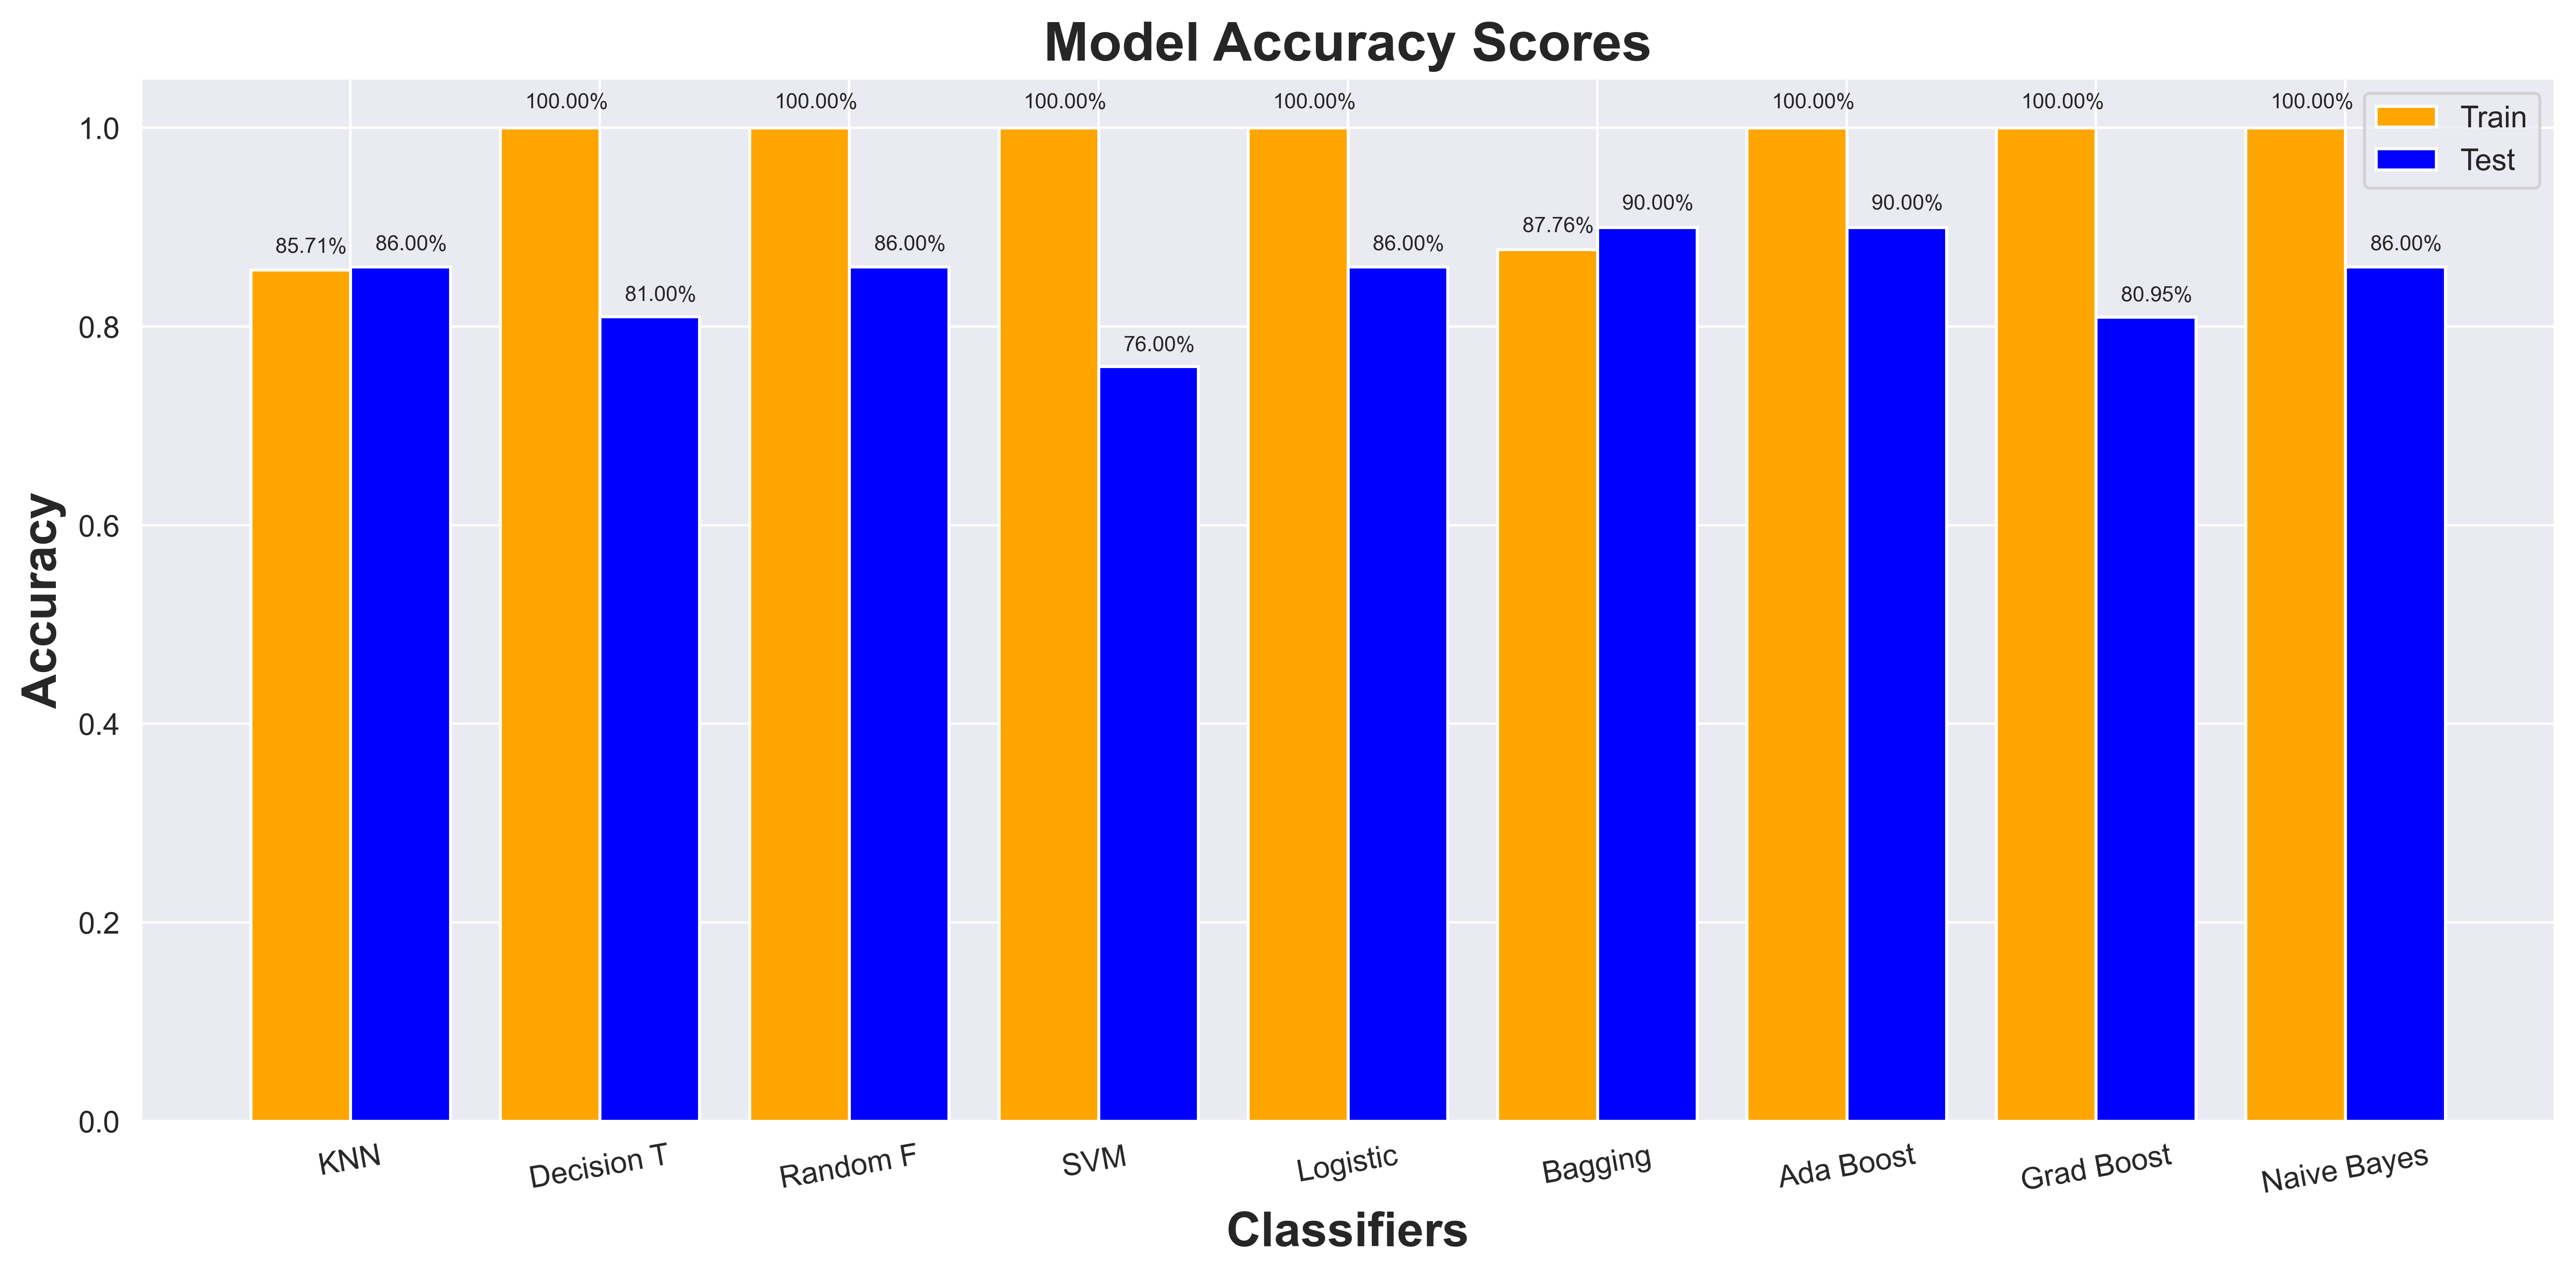

In [26]:
#plotting the accuracies

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('images/Mod_Acc_Bar', dpi = 500)

In [27]:
#model deployement using pickle
filename = 'Deployment/modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [28]:
filename = 'Deployment/vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))